In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
import os

## OpenFoam solver

In [51]:
probePath = "./TwoLayers/postProcessing/probes/0.000/h"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
OpenFoamData_h = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

In [52]:
probePath = "./TwoLayers/postProcessing/probes/0.000/theta"
widths = [14]*6
names = ['Time'] + [f"Probe {i}" for i in range(5)]
OpenFoamData_theta = pd.read_fwf(probePath, widths=widths,skiprows=7,names=names)

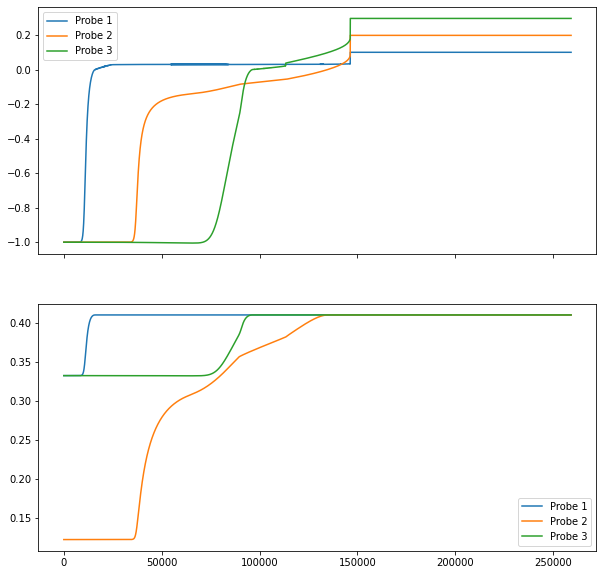

In [53]:
fig,axs = plt.subplots(2,1,sharex=True,figsize=[10,10])
for probe in names[2:-1]:
    axs[0].plot(OpenFoamData_h['Time'],OpenFoamData_h[probe],label=probe)
    axs[1].plot(OpenFoamData_theta['Time'],OpenFoamData_theta[probe],label=probe)

for ax in axs:
    ax.legend()
plt.show()

## Hydrus-1D

In [54]:
probePath = "./Hydrus1D/TWOLAY/Obs_Node.out"  
with open(probePath,'r') as f:
    rawHydrusData = f.readlines()[11:-1]
    rawHydrusData = [line.strip() for line in rawHydrusData]
    rawHydrusData = [re.sub("[ ]+", ",", line) for line in rawHydrusData]
    rawHydrusData = np.array([[float(i) for i in line.split(",")] for line in rawHydrusData])

names = ['Time'] + ['head_1','theta_1','flux_1'] + ['head_2','theta_2','flux_2'] + ['head_3','theta_3','flux_3']
HydrusData = pd.DataFrame(rawHydrusData,columns=names)

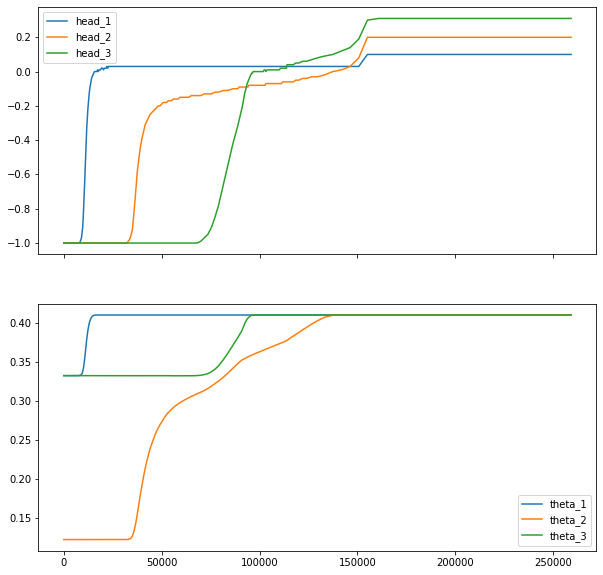

In [55]:
fig,axs = plt.subplots(2,1,sharex=True,figsize=[10,10])
for probe in names[1:]:
    if "head" in probe:
        axs[0].plot(HydrusData['Time'],HydrusData[probe],label=probe)
    elif "theta" in probe:
        axs[1].plot(HydrusData['Time'],HydrusData[probe],label=probe)

for ax in axs:
    ax.legend()
plt.show()

## Head comparison

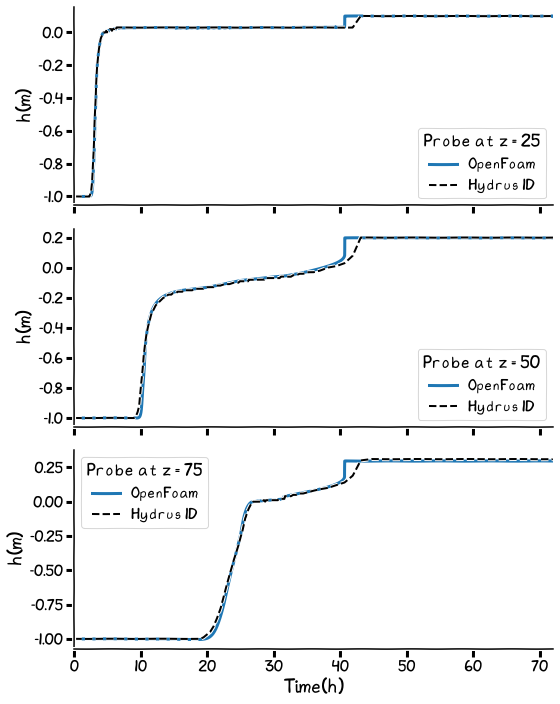

In [59]:
with plt.xkcd(scale=0.1, length=50, randomness=1):
#with plt.style.context('seaborn-deep'):
    fig,axs = plt.subplots(3,figsize=(8,10),tight_layout=True,sharex=True)
    for ax,probe in zip(axs,OpenFoamData_h.columns[2:-1]):
        ax.plot(OpenFoamData_h['Time']/3600,OpenFoamData_h[probe],lw=3,label="OpenFoam")
    
    for ax,probe in zip(axs,[i for i in HydrusData.columns[1:] if "head" in i]):
        ax.plot(HydrusData['Time']/3600,HydrusData[probe],ls='dashed',c='k',lw=2,label="Hydrus 1D")
    
    ax.set_xlabel("Time(h)",fontsize=18)

    for ax in axs:
        ax.set_ylabel("h(m)",fontsize=18)    
        ax.set_xlim([0,72])
        #ax.set_ylim([-1.05,.15])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    for ax,depth in zip(axs,(25,50,75)):
        ax.legend(title=f"Probe at z = {depth}",fontsize=14,title_fontsize=16)
    
    #fileForPNG = f"CompareWetFronts.png"
    #fig.savefig(fileForPNG);
    #os.system(f"xclip -se c -t image/png -i {fileForPNG}") # Does not work when ssh
    
    plt.show()

## Water content comparison

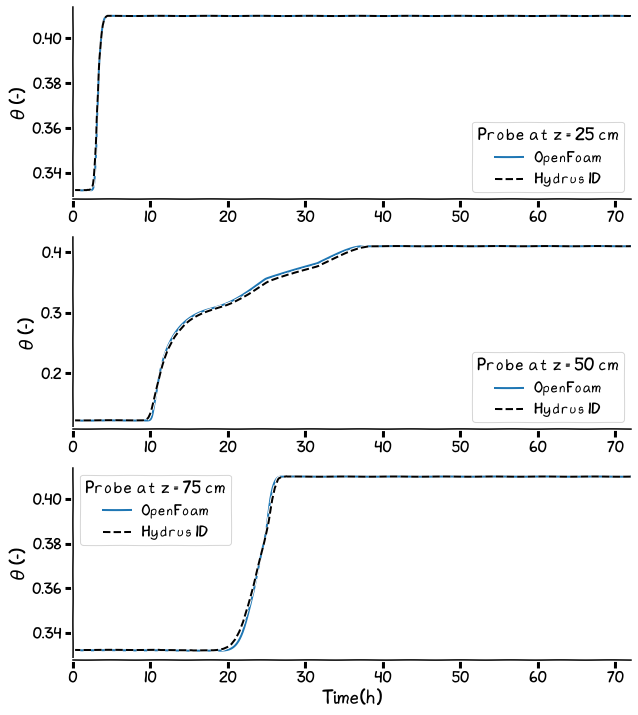

In [62]:
with plt.xkcd(scale=0.1, length=50, randomness=1):
#with plt.style.context('seaborn-deep'):
    fig,axs = plt.subplots(3,figsize=(10,12))
    for ax,probe in zip(axs,OpenFoamData_theta.columns[2:-1]):
        ax.plot(OpenFoamData_theta['Time']/3600,OpenFoamData_theta[probe],label="OpenFoam")
    
    for ax,probe in zip(axs,[i for i in HydrusData.columns[1:] if "theta" in i]):
        ax.plot(HydrusData['Time']/3600,HydrusData[probe],ls='dashed',c='k',lw=2,label="Hydrus 1D")
    
    ax.set_xlabel("Time(h)",fontsize=18)

    for ax in axs:
        ax.set_ylabel(r"$\theta$ (-)",fontsize=18)    
        ax.set_xlim([0,72])
        #ax.set_ylim([0.04,0.45])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    for ax,depth in zip(axs,(25,50,75)):
        ax.legend(title=f"Probe at z = {depth} cm",fontsize=14,title_fontsize=16)
    
    plt.show()

## Retention curve

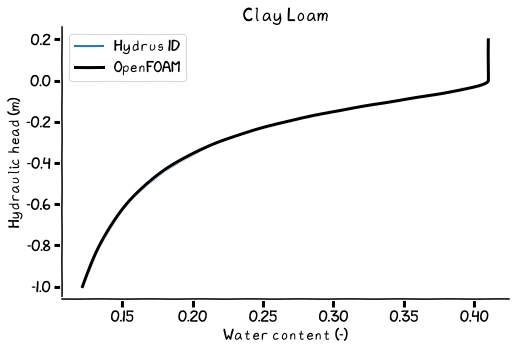

In [61]:
with plt.xkcd(scale=0.1, length=50, randomness=1):
    fig,axs = plt.subplots(1,2,figsize=(8,4))
    
    ### Clay Loam
    ax = axs[0]
    ax.plot(HydrusData['theta_2'],HydrusData['head_2'],
            lw=2,label="Hydrus 1D".marker="x")
    ax.plot(OpenFoamData_theta['Probe 2'],OpenFoamData_h['Probe 2'],
            lw=3,c='k',label="OpenFOAM")
    ax.set_xlabel("Water content (-)")
    ax.set_ylabel("Hydraulic head (m)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend()
    ax.set_title("Clay Loam")

    ### Sandy Loam
    ax.plot(HydrusData['theta_1'],HydrusData['head_1'],
            lw=2,label="Hydrus 1D")
    ax.plot(OpenFoamData_theta['Probe 1'],OpenFoamData_h['Probe 1'],
            lw=3,c='k',label="OpenFOAM")
    ax.set_xlabel("Water content (-)")
    ax.set_ylabel("Hydraulic head (m)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend()
    plt.show()

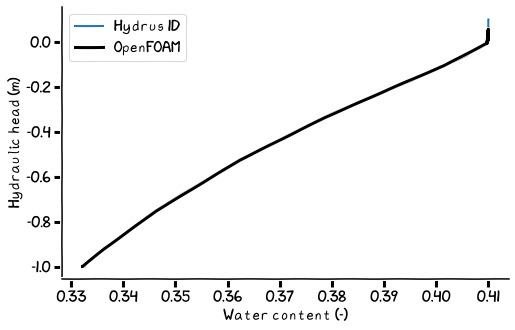

In [11]:
with plt.xkcd(scale=0.1, length=50, randomness=1):
    fig,ax = plt.subplots(figsize=(8,5))
    ax.plot(HydrusData['theta_1'],HydrusData['head_1'],
            lw=2,label="Hydrus 1D")
    ax.plot(OpenFoamData_theta['Probe 1'],OpenFoamData_h['Probe 1'],
            lw=3,c='k',label="OpenFOAM")
    ax.set_xlabel("Water content (-)")
    ax.set_ylabel("Hydraulic head (m)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend()
    plt.show()